## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 6: Fourier Analysis
## Due November 29, 2020 by 11:59 PM
### <span style="color: red">Julia Combs</span>

Copyright &copy; 2020, University of Washington

<hr>

In [79]:
import math
import imageio
import scipy # Has linear algebra
import scipy.integrate as int
import scipy.ndimage
import numpy as np
import sympy as sp
from sympy.plotting import plot, plot3d, PlotGrid
from sympy import fourier_transform, exp
from sympy.abc import t, k
sp.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import matplotlib.patches as pch
import matplotlib.image as mpimg
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist
%matplotlib inline
from matplotlib.ticker import MaxNLocator # to make integer ticks on x axis

### 1. Exponential form of Complex Numbers

Express each of the following complex numbers in the form $r e^{i\theta}$. Do this by hand (or in Latex) and check your work with Python.

$$0$$
$$1$$
$$-1$$
$$i$$
$$1-2i$$
$$-8+7i$$

Perform a cartesian to polar conversion in the form $a + bj$. This can then be transformed into the form $re^{i\theta}$.

General Equations:

$r = \sqrt(\lvert a^2 + b^2 \rvert)$ # this is the magnitude of the vector.

$\theta = \tan^{-1}({\frac{b}{a}})$ # this is the angle of the vector.

a) $0 \longrightarrow 0 + 0j = 0$

$r_a = \sqrt(\lvert 0^2 + 0^2 \rvert) \longrightarrow r_a = 0$

$\theta_a = \tan^{-1}(\frac{0}{0}) = 0$

$ a = 0$

b) $ 1 \longrightarrow 1 + 0j$

$r_b = \sqrt(\lvert 1^2 + 0^2 \rvert) \longrightarrow r_b = 1$

$\theta_b = \tan^{-1}({\frac{0}{1}}) \longrightarrow \theta_b = 0$

$b = 1$

c) $-1 \longrightarrow -1 + 0j$

$r_c = \sqrt(\lvert (-1)^2 + 0^2 \rvert) \longrightarrow r_c = 1$

$\theta_c = \tan^{-1}(\frac{0}{-1}) \longrightarrow \theta_c = 0$ 

$ c = 1$

d) $i \longrightarrow 0 + j$ 

$r_d = sqrt(\lvert 0^2 + 1^2 \rvert) \longrightarrow r_d = 1$

$\theta_d = \tan^{-1}(\frac{1}{0}) \longrightarrow \theta_d = NaN$

e) $1 - 2j$

$r_e = \sqrt(\lvert 1^2 + (-2)^2 \rvert) \longrightarrow r_e = 3$

$\theta_e = \tan^{-1}(\frac{-2}{1}) \longrightarrow \theta_e = -0.35\pi$

$e = 3e^{-0.35\pi j}$

f) $-8 + 7j$

$r_f = \sqrt(\lvert (-8)^2 + 7^2 \rvert) \longrightarrow r_f = 10.63$

$\theta_f = \tan^{-1}(\frac{7}{-8}) \longrightarrow \theta_f = -0.23\pi$

$f = 10.63e^{-0.23\pi j}$

### 2. A Trigonometric Identity

The goal of this exercise is to find formulas for $\cos(\alpha+\beta)$ and $\sin(\alpha + \beta)$. in terms of $\sin\alpha$, $\sin\beta$, $\cos\alpha$, and $\cos\beta$.

a) First, express $e^{(\alpha+\beta)i}$ directly in terms of the $\sin$ and $\cos$ using Euler's formula.

b) Next, express $e^{(\alpha+\beta)i}$ as a product of two exponentials. Then convert each term in the product into $\sin$ and $\cos$ using Euler's formula. Expand the expression and group the terms in the real part and the imaginary part.

c) Equate the real parts and imaginary parts from (a) and (b).

a) $e^{(\alpha+\beta) i} = \cos(\alpha + \beta) + \sin(\alpha + \beta) i$

b) $e^{(\alpha + \beta) i} = e^{(\alpha i + \beta i)} \longrightarrow e^{\alpha i} + e^{\beta i} = \cos(\alpha) + i\sin(\alpha) + \cos(\beta) + i\sin(\beta)$ 


$e^{(\alpha + \beta) i} = (\cos(\alpha) + \cos(\beta)) + (\sin(\alpha) + \sin(\beta))i$

c) $\cos(\alpha + \beta) = \cos(\alpha)\cos(\beta) - \sin(\alpha)\sin(\beta)$

and

$\sin(\alpha+\beta) = \sin(\alpha)\cos(\beta) + \cos(\alpha)\sin(\beta)$

so

$\cos(\alpha)\cos(\beta) - \sin(\alpha)\sin(\beta) + [\sin(\alpha)\cos(\beta) + \cos(\alpha)\sin(\beta)]i$

then

$\frac{1}{2}[\cos(\alpha-\beta) + \cos(\alpha+\beta)] - \frac{1}{2}[\cos(\alpha-\beta) - \cos(\alpha+\beta)] + [\frac{1}{2}[\sin(\alpha+\beta) + \sin(\alpha-\beta)] + \frac{1}{2}[\sin(\alpha+\beta) - \sin(\alpha-\beta)]]i$

$\cos(\alpha+\beta) + \sin(\alpha+\beta)i = e^{(\alpha+\beta)i}$

### 3. Fourier Series Approximation

Similar to the example of the square wave done in class, find a Fourier Series approximation to the function

$$
f(t) = \left |cos(2\pi t) \right|
$$

which is a *rectified cosine*. Make sure you get the period of this function correct. Make a plot with three subplots for $N=5$, $N=10$, and $N=20$ showing better and better approximations.

Once rectified the period essentially doubles giving $2L$ or $2\pi$.

$a_n = \frac{1}{L} \int_0^{2L} f(x)\cos(\frac{n \pi x}{L}) dx$

$a_n = \frac{1}{\pi} \int_0^{2\pi} cos(2\pi t)\cos(nt) dt$

$a_n = \frac{1}{\pi} \int_0^{2\pi} \frac{1}{2}[cos(2\pi t - nt) + \cos(2\pi t+nt)] dt$

$a_n = \frac{1}{\pi} \int_0^{2\pi} \frac{1}{2}cos(2\pi t - nt) + \frac{1}{2}\cos(2\pi t+nt) dt$

$a_n = \frac{1}{\pi} \left[ \frac{\sin((-n + 2 \pi) t)}{(-2 n + 4 \pi)} + \frac{\sin((n + 2 \pi) t)}{(2 n + 4 \pi)}\right]_0^{2\pi}$

$a_n = \frac{1}{\pi} \left[ \frac{\sin(-2\pi n + 4 \pi^2)}{(-2 n + 4 \pi)} + \frac{\sin(2\pi n + 4 \pi^2)}{(2 n + 4 \pi)}\right]$

$a_0 = \frac{1}{\pi} \left[\frac{\cos(2 \pi^2)\sin(2 \pi^2)}{(\pi)}\right]$

$a_0 = \frac{\cos(2 \pi^2)\sin(2 \pi^2)}{\pi^2}$

$f(t) = \frac{a_0}{2} + \sum_{n = 0}^{\infty} a_n \cos (nt)$

$f(t) = \frac{\cos(2 \pi^2)\sin(2 \pi^2)}{2\pi^2} + \sum_{n = 0}^{\infty} \left( \frac{\sin(-2\pi n + 4 \pi^2)}{(-2 \pi n + 4 \pi^2)} + \frac{\sin(2\pi n + 4 \pi^2)}{(2 \pi n + 4 \pi^2)}\right) \cos(nt)$

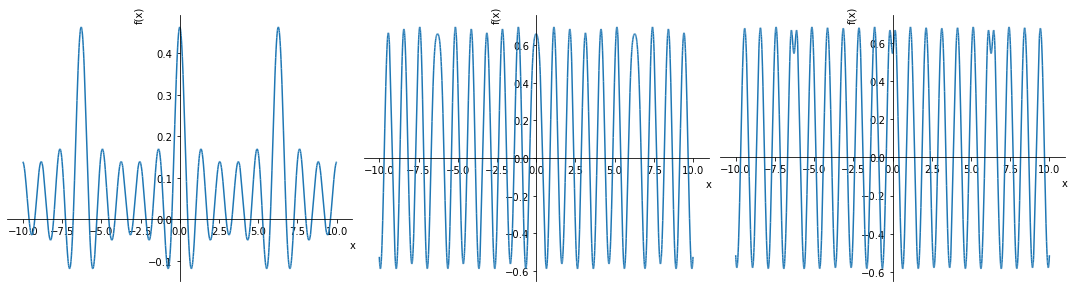

In [78]:
a0 = (np.cos(2*np.pi**2)*np.sin(2*np.pi**2))/(2*np.pi**2)

n = sp.Symbol('n')
x = sp.Symbol('x')
expr = ((sp.sin(-2*sp.pi*n + 4*sp.pi**2))/(-2*sp.pi*n + 4*sp.pi**2) + (sp.sin(2*sp.pi*n + 4*sp.pi**2))/(2*sp.pi*n + 4*sp.pi**2))*sp.cos(n*x)

output1 = plot(a0 + sp.Sum(expr,(n,0,5)).doit(), show=False)

output2 = plot(a0 + sp.Sum(expr,(n,0,10)).doit(), show=False)

output3 = plot(a0 + sp.Sum(expr,(n,0,20)).doit(), show=False)

PlotGrid(1,3, output1, output2, output3, size=(15,4));

### 4. Orthogonality

Show that $\cos(2\pi t)$ and $\sin(2 \pi t)$ are orthogonal by showing that their inner product (a.k.a. dot product) is zero. Hint: Express the two functions in exponential form, and expand their product inside the integral.

Let $f = \sin(2\pi t)$ and $g = \cos(2\pi t)$. 

Proof that $f \cdot g = 0 \longrightarrow \lvert f \rvert \lvert g \rvert \cos(\theta) = 0$

For orthogonality: 

$f \cdot g = \int_{t_1}^{t_2}f(t)g(t)dt = 0$

$\int_{t1}^{t2} \sin{2\pi t}\cos{2\pi t} dt$


Use the trig identity: $\sin(nx)\cos(mx) = \frac{1}{2}(\sin(n+m)+\sin(n-m))$

$\int_{t_1}^{t_2}\frac{1}{2}(\sin(2\pi t + 2\pi t) + \sin(2\pi t - 2\pi t)) \longrightarrow \frac{1}{2}\int_{t_1}^{t_2}(\sin(4\pi t))$

Let $u = 4\pi t$, therefor $du = \frac{1}{4 \pi}dt$.


$\frac{1}{2} \int_{t_1}^{t_2}\sin(u)du \longrightarrow -\frac{1}{8\pi}\cos{4\pi t} \Big|_{t_1}^{t2}$

$-\frac{1}{8\pi} (\cos(4\pi t_2) - cos(4\pi t_1))$

$-\frac{1}{8\pi}(-2sin(\frac{1}{2}(4\pi t_2 + 4\pi t_1))\sin(\frac{1}{2}(4\pi t_2 - 4\pi t_1))$

$-\frac{1}{4\pi}[sin(2\pi (t_2 + t_1))\sin(2\pi (t_2 - t_1))] = 0$

Because the above equation is equivalent to zero, $sin(2\pi t)$ and $cos(2\pi t)$ are orthogonal. 

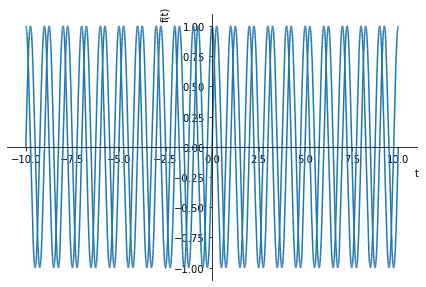

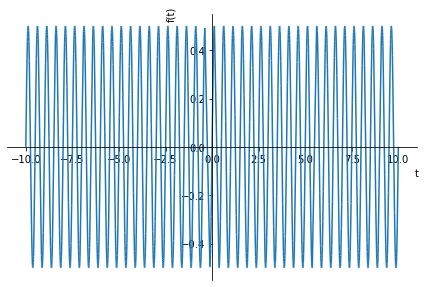

z = sin(6.28318530717959*t)*cos(6.28318530717959*t)


0.0

In [75]:
t = sp.Symbol('t')
pi = np.pi

x = sp.sin(2*pi*t)
y = sp.cos(2*pi*t)

z = np.dot(x,y)

sp.plot(x, y)

sp.plot(z)

print('z =', z)

round(z.subs('t', 0.5), 3)

### 5. Fourier Transforms

Find the Fourier Transforms of the following functions. You can use `sympy`. 
Make sure to simplify, these shouldn't give complicated results. 

Plot original functions and their transforms in a nice 3 $\times$ 2 grid of plots. Label the sub plots.

$$
f(t) = \left \{ 
\begin{array}{l}
1 \;\mathrm{if} \;t \geq 0 \\
0 \;\mathrm{else}
\end{array}
\right .
$$

$$
f(t) = \frac{1}{1+t^2}
$$

$$
f(t) = e^{-\pi t^2}
$$

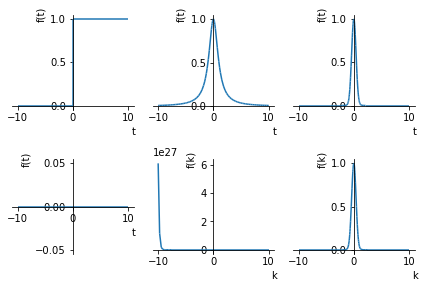

In [80]:
f1 = fourier_transform(sp.Piecewise((1, t>=0), (0, True)), t, k)

f2 = fourier_transform(1/(1+t**2), t, k)

f3 = fourier_transform(exp(-sp.pi * t**2), t, k)

eq1 = plot(sp.Piecewise((1, t>=0), (0, True)), show=False)
           
eq2 = plot(1/(1+t**2), show=False)

eq3 = plot(exp(-sp.pi * t**2), show=False)

p1 = plot(sp.DiracDelta(t), show=False)
          
p2 = plot(f2, show=False)

p3 = plot(f3, show=False)

PlotGrid(2,3, eq1, eq2, eq3, p1, p2, p3);

### 6. Solve a system of ODEs

Similar to the ODE example in the notes, find a solution to the two differential equations

\begin{eqnarray}
\dot x & = & -y \\
\dot y & = & -x + u
\end{eqnarray}

a) First take the Fourier Transform of both equations. 

b) Solve for $Y(s)$ in terms of $U(s)$. 

c) Note that the solution for $Y(s)$ involves a function of $s$ times $U(s)$. Figure out the inverse Fourier Transform of that function. 

d) Use a convolution to figure out $y(t)$ in terms of $u(t)$. 

e) Find $X(s)$ in terms of $Y(s)$ and then $x(t)$ in terms of $y(t)$. 

Fourier Seriers:

$f(x) = A_0 + \sum_{n=1}^{\infty}A_n\cos(\frac{n\pi x}{L}) + \sum_{n=1}^{\infty}B_n\sin(\frac{n\pi x}{L})$

$A_0 = \frac{1}{2L}\int_{-L}^{L}f(x)dx$

$A_n = \frac{1}{L}\int_{-L}^{L}f(x)cos(\frac{n\pi x}{L})dx, n > 0$

$B_n = \frac{1}{L}\int_{-L}^{L}f(x)sin(\frac{n\pi x}{L})dx, n > 0$


#### Analysis of $\dot x = -y$ 

$f(x) = \frac{1}{2L} \lim_{-L}^{L}(-y)dy + \sum_{n=1}^{\infty}\frac{1}{L}\lim_{-L}^{L}(-y)\cos(\frac{n\pi y}{L})dy \cos(\frac{n\pi y}{L}) + \sum_{n=1}^{\infty}\frac{1}{L}\lim_{-L}^{L}(-y)\sin(\frac{n\pi y}{L})dy\sin(\frac{n\pi y}{L})$

$\dot x = \sum_{n=1}^{\infty}\frac{2(-1)^nL\sin(\frac{n\pi y}{L})}{\pi n}$


#### Analysis of $\dot y = -x + u$

#### 6a

In [76]:
L = sp.Symbol('L')

xdotA0 = 

### 7.  Image Processing

Find a nice gray scale image to load, or use the Minion image from class. Call the resulting matrix $m$.

a) Render the image using `matplotlib`. 

b) Take the DFT of the image $m$ to get a matrix $M$. Then make a new matrix $M_\mathrm{new}$ in which each entry is just the magnitude of the corresponding entry in $M$. Create a new image from the inverse Fourier transform of this image and render it. 

c) Do the same thing, except set the entries in $M_\mathrm{new}$ to the angle of the entries in $M$. Create a new image from the inverse Fourier transform of this image and render it.

d) Do the same thing, except normalize all the entries in $M_\mathrm{new}$ to have magnitude 1. Create a new image from the inverse Fourier transform of this image and render it.

What might you conclude about the information contained in the magnitude of the transformed image? What might you conclude about the information contained in the angle?

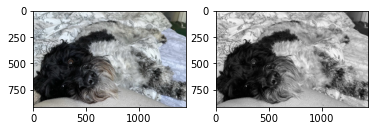

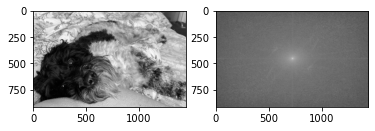

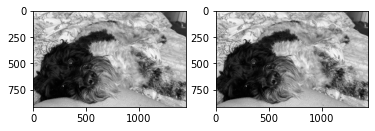

In [66]:
# upload image
m = imageio.imread('chip.jpg')

# show the original image
fig, ax = plt.subplots(1,2)
ax[0].imshow(m)

# convert image to grey scale

img = mpimg.imread('chip.jpg')
mgrey = rgb2gray(img)

ax[1].imshow(mgrey, cmap = 'gray')


m_fourier = np.fft.fftshift(np.fft.fft2(mgrey))

fig2, ax2 = plt.subplots(1,2)
ax2[0].imshow(mgrey, cmap = 'gray')
ax2[1].imshow(np.log(abs(m_fourier)), cmap = 'gray')

rows, cols = mgrey.shape
crows, ccol = int(rows/2), int(cols/2)


fig3, ax3 = plt.subplots(1,2)
ax3[0].imshow(mgrey, cmap = 'gray')
ax3[1].imshow(m_new, cmap = 'gray')

In [74]:
rows, cols = mgrey.shape
rows, cols
r = int(rows)
K = 8
M[rows/2 - K: rows/2 + K, cols/2 - K: cols/2 + K] = 0.001


TypeError: 'module' object is not callable